
## Bloom Filters 

### 1. Give an overview of the types of operations that a Bloom filter supports, and where Bloom filters might be useful.

Bloom filters are the variants to the hash tables. Bloom filters get their name from their creator Burton Howard Bloom who designed the algorithm in 1970. The primary usage of bloom filters is to check whether the desired element is a member of the list in hand.  Therefore it makes sense that the primary operations that are supported by basic bloom filter are insertion and lookups. Basic bloom filters can be modified to support operations such as deletion to be customized for different goals. There are two outcomes that basic bloom filter can give. Basic bloom filters give "Definitely not in the list" or "Probably in the list" as query returns. 

Since the bloom filters do not store the value, they are more space and memory efficient compared to hash tables. On the other hand, the lack of value leads to some error during the lookups. Since lookups purely based on index values, there is a possibility of false positives. False positives mean that the algorithm may give a "Probably in the list" as a query return even though the element that you are looking up for is not a member of the list. Therefore, there is a trade off between the time and memory efficiency and the error rate. Before using bloom filters as a part of your algorithm, you need to think about whether the false positive error is a problem for your system. Also, bloom filters only have false positive errors but none false negative error. It will only give "Definitely not in the list" if the element that you are looking for is not a part of the list. 

The false negative error happens mainly because the data is stored in the bit arrays. All bits are defined as 0 in the beginning, but as we insert items to the bloom filter, it will change some arrays to 1 (based on the index numbers the hash function will give). However as the bit array size is limited, there will be collisions as the number of item in the list increases. As a side note, as the bit array size gets smaller, so the collision risk and false positive risk will increase. Therefore hash function may give index numbers that are already full, even though the element is not on the list. 

### Example applications:

##### Early version of spell checkers:
In the early versions of spell checkers, they stored all the words in the language in a bloom filter. As the document got new words as input, the algorithm would lookup if the written word is in the dictionary. Since bloom filters are more time and memory efficient than original has tables and list, it was time efficient way to check the spelling of the words. However, due to false positive error, the algorithm might have identified some words as true even though they are not on the dictionary. It was a little trade-off; developers had to sacrifice until they come up with a more optimal and efficient way to design spell checker algorithms.
##### Password checkers:
Bloom filters are used commonly as a password checker for the membership portals of websites. The list of forbidden passwords (for example, words shorter than 8 character or only number) will be inserted into the bloom filter. Each time when a user wants to set their password, the algorithm will use the lookup operation of bloom filter to see if the new password is in the forbidden list. However due to false positive error, once in a while, the system will reject the new passwords, even though they meet the criteria. Depending on the false positive error rate of the bloom filter implementation the website uses, it may not be a big trade-off considering that you are detecting not okay password way faster than other methods.


### 2. Give a description of the hash functions that your implementation uses.

In my bloom filter implementation, I used two hash function that we previously examined in the class by means of time and memory efficiency. Since it is a basic implementation of a bloom filter, I didn't try to implement the k-way hash function. Since they are simple hash functions, I explained each step in the code via comments. 

However after my research, I learned, what are the properties of an "ideal" hash function for the bloom filter. This information can be taken into account if we want to optimize this basic implementation of the Bloom Filter. Essentially, the "ideal" hash functions should be uniformly distributed and independent. The uniformity of the distribution s important because if there is clustering on the array, it will increase the number of the collisions which will increase the false positive rate. Also if the hash functions are not independent, it will again increase the chance of collision. Possible hash function options that can be found in the python library that will meet these criteria are murmur, FNV series, and Jenkins hash. Cryptographic hash functions can be used to improve efficiency, but they will be expensive in the calculation.




4.1 Memory size as a function of the false positive rate
While approaching this question, I assumed that memory size means the bit array size because in the basic bloom filters bit array is the primary form of storage. As it can be seen on the graph bellow as the memory size/bit array size gets bigger, the false positive rate decreases. The primary reason behind the negative correlation is that as the bit array size gets smaller, there is a higher chance for collisions which will lead the false positives. In addition, I chose to use a scatter plot diagram because it will show the distribution better and help realize the noises. The dots on the scatter plot diagram does not form a perfect line because my implementation is a basic bloom filter and the number of hash functions are not optimized. If we optimize my bloom filter, we can expect to have less noise on the data.


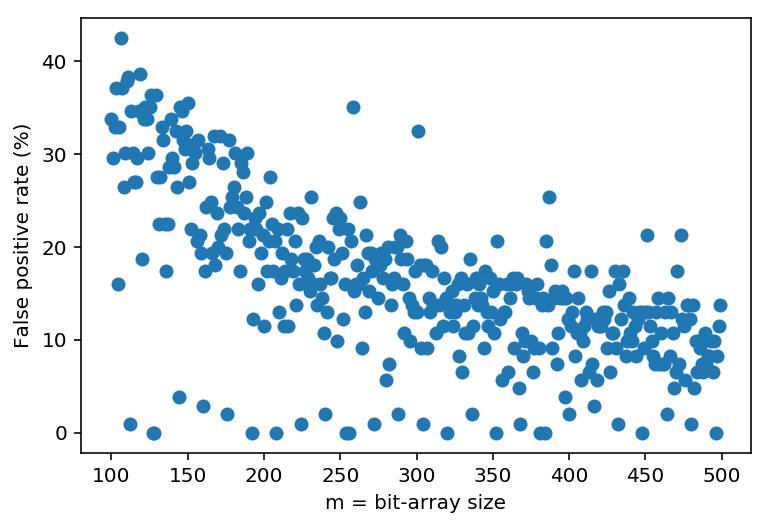

4.2 Memory size as a function of the number of items stored
Since in my implementation, the user inputs the size of the bit array size and the number of items stored. I created a function to match the optimal size of a bit array according to the number of items stored in the bloom filter. After I created the function, I test it an realized that there is a positive linear correlation between the optimal bit array size and the number of items stored. It makes sense because if we keep the bit array size same while the number of items stored, it will increase the number of collisions thus will increase the false positive rate. Therefore for an optimal bloom filter, we need to increase the bit array size as we increase the number of items to be memory efficient and decrease the false positive rate.


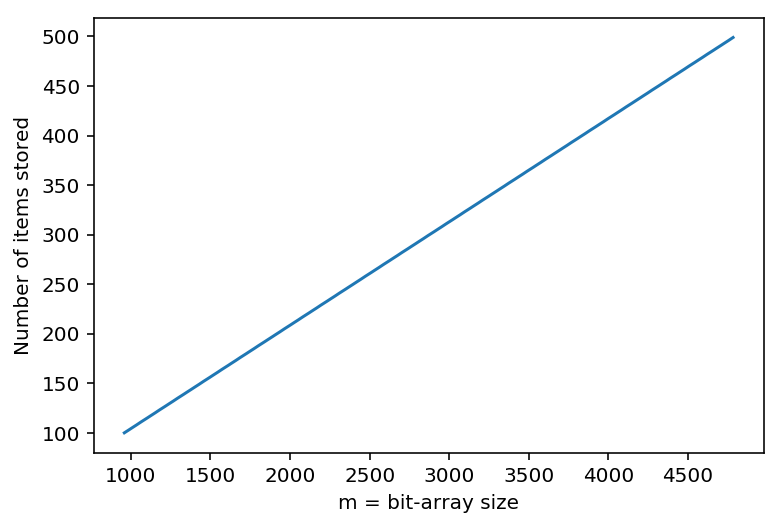

4.3 Access time as a function of the false positive rate
As I discussed in the first sub-question, it my bloom filter implementation false postive rate is highly dependent on the array size of the bloom filter. The main reason behind that is the only input that my bloom filter accepts is the array size (m) and the number of hash function stays stable. Therefore, theoretically false positive rate will be stable if I keep the m stable. There is no direct correlation between the access time and the false positive rate because flase positve rate does not affect the speed of the algorithm. To prove that I plot the running time of the lists with different false positive rates but same bit array size and the list of number of items stored . As it can be seen on the graph, there is no correlation.


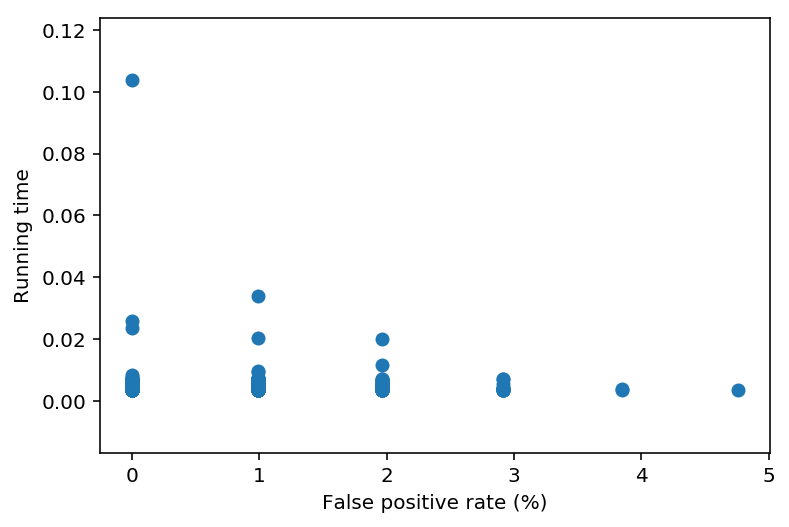

4.4 Access time as a function of the number of items stored
Since we need to insert each of these items to the list, as the number of items increases the running time increases too. We can say that the running time and the number of items stored negatively correlated. However since bloom filter stores less item and more memory efficient than most of the list, its running time can be still advantageous even with the size of input. In the graph that plotted, there is a strong negative correlation between these values if you ignore the outliers. Outliers are byproducts of the basic bloom filter and can be improved by optimization.


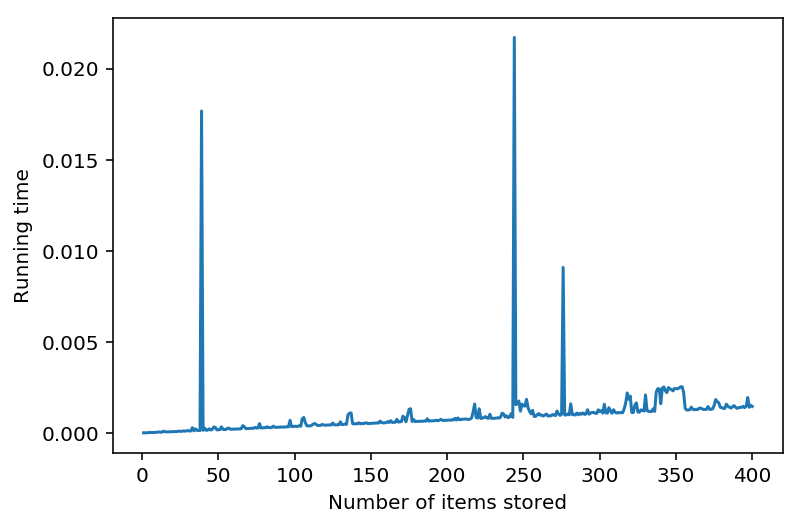

5. Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate.
Firstly, I graph the theoretically expected rate (based on the theoretically expected rate formula) against the bit array size to visualize and understand the correlation between the variables. As a result of the graph, I realized that there is a negative correlation between the variables. As the bit array size gets bigger, the false positive rate gets smaller. I had a similar conclusion as part of my answer to 4.1. As I mentioned before, it makes sense that the false positive rate decreases as the bit array size increase because the probability of collision gets smaller. To juxtapose the theoretical graph with my empirical graph, I graph the empirical results. After seeing them side by side, I can say that even though my implementation’s false positive rate matches the theoretically expected rate due to outliers/noise, it follows the generall trend. As we keep optimizing t

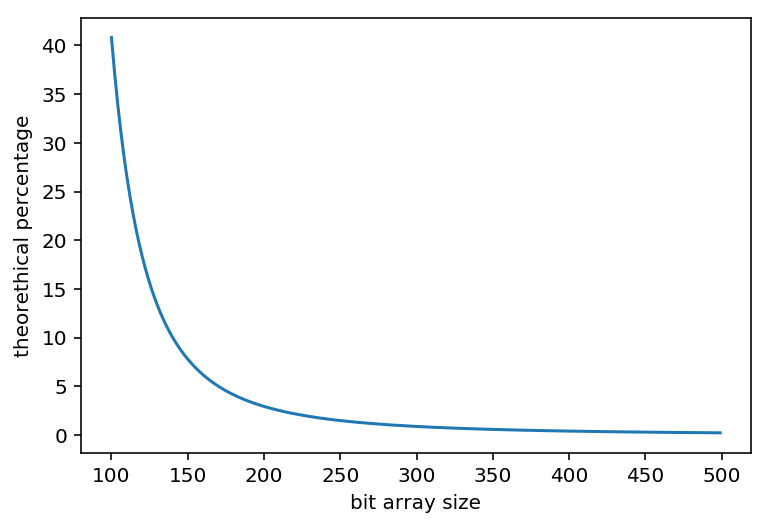

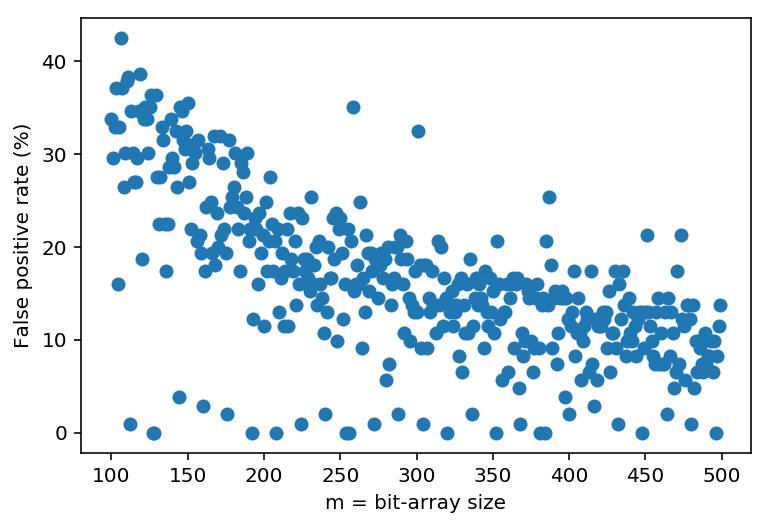

To evaluate the performance of my implementation, I plotted empirical values against the theoretical value. The empirical values closer to the theoretical values when the bit array size smaller but as the bit array size gets bigger the noise introduced to the algorithm increases. In my opinion, the main problem of my implementation can be the constant number of the hash functions. To match the theoretical value, I can have more optimal hash function depending on the bit array size and the number of item in the list.


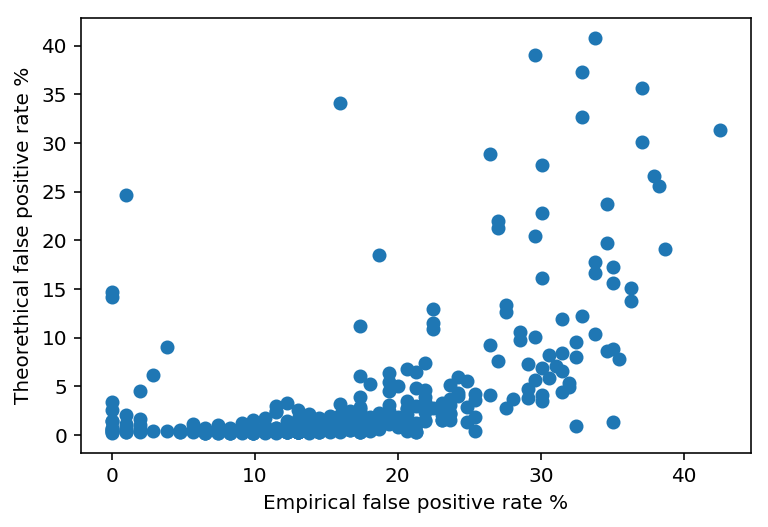

In [16]:
#Bloom Filter implementation
import math
import matplotlib.pyplot as plt
import string
import random
import time
#I used two of the hash fucntions that we discussed in the class as the most efficient among our examples
def hash_str1(string):
    #defining the parameter
    ans = 0
    #creating a loop to run the code for each character in the string
    for chr in string:
        #ord() returns an integer representing Unicode code point for the given Unicode character and by mutiplying ans with each characters Unicode, we create a uniquie value for each character. The main reason why we add the integer values of each character is that to create a integer value for the word as unique as possible. 
        ans = ans ^ ord(chr)
    #returns the integer value for the string whcih we will use as the index number
    return ans
#same logic as the previous hash function just the way the value of how ans is defined is different.
def hash_str2(string):
    ans = 0
    for chr in string:
        ans = ans * 128 + ord(chr)
    return ans

#I defines BloomFilter as a class to be able to refer values with in the class
class BloomFilter:
    
    def __init__(self, m):
        #size of the bit array
        self.m=m
        #I manually created a bit array to visualize the process
        self.vector = [0]*m
    #insertion operation of the bloom filter
    def add(self, item):
        #getting the index number from the 1st hash function
        index = hash_str1(item) % self.m
        #changing the input from 0 to 1 on vector where the given ndex number by the hash function
        self.vector[index] = 1
        #getting the index number from the 2nd hash function
        index2 = hash_str2(item) % self.m
        #changing the input from 0 to 1 on vector where the given ndex number by the hash function 2
        self.vector[index2] = 1
        
    #lookup operation of the bloom filter  
    def lookup(self, item):
        #getting the index number according both of the hash functions hash function
        index = hash_str1(item) % self.m
        index2 = hash_str2(item) % self.m
        if (self.vector[index]==1 and self.vector[index2]==1):
            #the item is "Probably" in the list
            return True
        else:
            #the item is "Definetely not in the list" 
            return False

#function to create random word to be used in the list for the tests
def word(n, chr):
    #function returns to a word in the length of "n". The word is made by the random order of "chr" 
    return ''.join(random.choice(chr) for i in range(n))
#defining a function to test the bloom filter by the means of false positive 
def test_bf(m,n):
    bf=BloomFilter(m)
    #creating a list as the storage to check the possible false positives. Otherwise, Bloom Filter will not save the values.
    storage = []
    #creating the list with n elements and random word length and adding it to bloom filter 
    keys = [word(10,'abcde') for i in range(n)]
    #creating a for loop to add each word 
    for rk in keys:
        #inserting the words to the bloom filter
        bf.add(rk)
        #inserting the words to the storage
        storage.append(rk)
    #inserting new elements to the list to test the false positives
    keys = keys + [word(10,'fghil') for i in range(n)]
    #the parameter false positive
    fp=0
    #the parameter for the true  query returns for "Probably"
    t=0
    #for loop to do look ups and find the false positive rate
    for rk in keys:
        #cherry picking the lookups which are "Probably" 
        if bf.lookup(rk) == True:
            #checks if the value who has the lookup query return as "Probably" in the storage
            if rk in storage:
                #increases the number of true  query returns for "Probably"
                 t = t +1
            else:
                #increases the number of the false positives
                fp = fp + 1
    #returns the percentage of false positive in the given experiment       
    return float(fp/(t+fp))*100


print("4.1 Memory size as a function of the false positive rate")
print("While approaching this question, I assumed that memory size means the bit array size because in the basic bloom filters bit array is the primary form of storage. As it can be seen on the graph bellow as the memory size/bit array size gets bigger, the false positive rate decreases. The primary reason behind the negative correlation is that as the bit array size gets smaller, there is a higher chance for collisions which will lead the false positives. In addition, I chose to use a scatter plot diagram because it will show the distribution better and help realize the noises. The dots on the scatter plot diagram does not form a perfect line because my implementation is a basic bloom filter and the number of hash functions are not optimized. If we optimize my bloom filter, we can expect to have less noise on the data.")

#To compare the memory size as a function of the false positive rate I will plot the error rates against their bit array sizes
#creating a list of sizes of bit arrays
m = [i for i in range(100, 500)]
#defining the length of the list
n = 100
#empty list the collect percentiles for the false positives
perc=[]
#for loop to login the false positive rates at different array sizes
for i in range (100,500):
    perc.append(test_bf(i,n))

# plotting the error rates against their bit array sizes
plt.scatter(m, perc)
ylabel('False positive rate (%)')
xlabel('m = bit-array size')
show()   

print("4.2 Memory size as a function of the number of items stored") 
print("Since in my implementation, the user inputs the size of the bit array size and the number of items stored. I created a function to match the optimal size of a bit array according to the number of items stored in the bloom filter. After I created the function, I test it an realized that there is a positive linear correlation between the optimal bit array size and the number of items stored. It makes sense because if we keep the bit array size same while the number of items stored, it will increase the number of collisions thus will increase the false positive rate. Therefore for an optimal bloom filter, we need to increase the bit array size as we increase the number of items to be memory efficient and decrease the false positive rate.")
#defining the list of number of items stored
n_optimal = [i for i in range(100, 500)]
#empty list for the optimal bit array size
m_optimal =[]
#for loop to find the optimal bit array size for the list of number of items stored
for i in range (100,500):
    m_optimal.append(math.ceil((i * math.log(0.01)) / (math.log(1 / pow(2, math.log(2))))))

#plotting the optimal bit array size against the list of number of items stored for comparision and see the relation
plt.plot(m_optimal, n_optimal)
ylabel('Number of items stored')
xlabel('m = bit-array size')
show()

print("4.3 Access time as a function of the false positive rate")
print ("As I discussed in the first sub-question, it my bloom filter implementation false postive rate is highly dependent on the array size of the bloom filter. The main reason behind that is the only input that my bloom filter accepts is the array size (m) and the number of hash function stays stable. Therefore, theoretically false positive rate will be stable if I keep the m stable. There is no direct correlation between the access time and the false positive rate because flase positve rate does not affect the speed of the algorithm. To prove that I plot the running time of the lists with different false positive rates but same bit array size and the list of number of items stored . As it can be seen on the graph, there is no correlation.")

#the list for the false positive rates
fp=[]
#the list for the time that is needed at different false positive rates
time_fp=[]
#loop to test 400 different list with same bit array size and the list of number of items stored
for i in range (100,500):
    start = time.time()
    n=100
    fp.append(test_bf(5000,n))
    end = time.time()
    time_fp.append(end-start)

#plotting false positive rate against the time that it takes to access to the same list
plt.scatter(fp, time_fp)
ylabel('Running time')
xlabel('False positive rate (%)')
show()   

print("4.4 Access time as a function of the number of items stored")
print("Since we need to insert each of these items to the list, as the number of items increases the running time increases too. We can say that the running time and the number of items stored negatively correlated. However since bloom filter stores less item and more memory efficient than most of the list, its running time can be still advantageous even with the size of input. In the graph that plotted, there is a strong negative correlation between these values if you ignore the outliers. Outliers are byproducts of the basic bloom filter and can be improved by optimization.")
#list for random elements
rand =[]
#list for the number of items stored
num=[]
#list for the running time with different number of items stored
time_num=[]
#for loop to test list with from 100 to 500 number items
for i in range (100,500):
    rand.append(word(10,'abcde'))
    bf=BloomFilter(500000)
    num.append(len(rand))
    start = time.time()
    for rd in rand:
        bf.add(rd)
    end = time.time()
    time_num.append(end-start)
#plotting the running time against number of items stored
plt.plot(num, time_num)
ylabel('Running time')
xlabel('Number of items stored')
show()  

print("5. Produce a plot to show that your implementation’s false positive rate matches the theoretically expected rate." )
print("Firstly, I graph the theoretically expected rate (based on the theoretically expected rate formula) against the bit array size to visualize and understand the correlation between the variables. As a result of the graph, I realized that there is a negative correlation between the variables. As the bit array size gets bigger, the false positive rate gets smaller. I had a similar conclusion as part of my answer to 4.1. As I mentioned before, it makes sense that the false positive rate decreases as the bit array size increase because the probability of collision gets smaller. To juxtapose the theoretical graph with my empirical graph, I graph the empirical results. After seeing them side by side, I can say that even though my implementation’s false positive rate matches the theoretically expected rate due to outliers/noise, it follows the generall trend. As we keep optimizing the algorithm, it will get closer to theoretical.")

#the list for different bit array size
m = [i for i in range(100, 500)]
#number of items in the list
n = 100
#the list for the theoretical error rate percentages
theo_perc=[]
#for loop to run the bloom filters with 100 bit-size arrays to 500
for i in range (100,500):
    #the formula for the theoretically expected false positive rate
    theo_perc.append(( 1-math.exp( (2*n)/i) )**2)

# plotting the theoretical error rates against their bit array sizes
plt.plot(m, theo_perc)
ylabel('theorethical percentage')
xlabel('bit array size')
show()  

# plotting the error rates against their bit array sizes
plt.scatter(m, perc)
ylabel('False positive rate (%)')
xlabel('m = bit-array size')
show() 

print("To evaluate the performance of my implementation, I plotted empirical values against the theoretical value. The empirical values closer to the theoretical values when the bit array size smaller but as the bit array size gets bigger the noise introduced to the algorithm increases. In my opinion, the main problem of my implementation can be the constant number of the hash functions. To match the theoretical value, I can have more optimal hash function depending on the bit array size and the number of item in the list.")

plt.scatter(perc, theo_perc)
ylabel('Theorethical false positive rate %')
xlabel('Empirical false positive rate %')
show()









### Appendix
##### #dataviz:
For the questions 4 and 5, I used various graphs to explain the relation between two variables better. I cooperated appropriate graph with clear labels to describe the correlation between variables. Also, these data visualization gave me insight on how I can work towards to optimize my bloom filter implementation. Also, I chose when to use the scatter plot diagram or line graph to elaborate my point in the most efficient way. 

##### #algorithms:
I efficiently implemented a working code while explaining the logic behind each step via comments. To implement the bloom filter, before starting I explained the properties and the logic behind the algorithm thus my implementation can be understood easier by the audience. 


### References

Bloom filter. (n.d.). Retrieved from https://en.wikipedia.org/wiki/Bloom_filter

A. Kumar. (n.d.) Bloom Filters – Introduction and Python Implementation. Retrieved from https://www.geeksforgeeks.org/bloom-filters-introduction-and-python-implementation/

